In [1]:
!gdown 1H3JoCyz0uYFi6p9wXhJws50iQ6sm3LEf

Downloading...
From: https://drive.google.com/uc?id=1H3JoCyz0uYFi6p9wXhJws50iQ6sm3LEf
To: /content/textBlob6lakh.csv
100% 72.5M/72.5M [00:00<00:00, 167MB/s]


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("textBlob6lakh.csv")

In [3]:

label=[]
for senti in data['sentiment']:
  if(senti=='positive'):
    label.append(1)
  elif(senti=='negative'):
    label.append(2)
  else:
    label.append(0)    
label
data['label']=label

In [6]:


# Split the data into training and testing sets
train_sentences, test_sentences, train_labels, test_labels = train_test_split(data["text"], data["label"], test_size=0.2, random_state=42)

# Tokenize the sentences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)

# Convert the sentences to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# Pad the sequences to have the same length
max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating="post", padding="post")
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating="post", padding="post")

# Define the CNN model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    keras.layers.Conv1D(32, 5, activation="relu"),
    keras.layers.MaxPooling1D(5),
    keras.layers.Conv1D(64, 5, activation="relu"),
    keras.layers.GlobalMaxPooling1D(),
    # keras.layers.Dense(64, activation='softmax'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

# Train the model
history=model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print("Test accuracy:", test_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 32)            2592      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 19, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 15, 64)            10304     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 3)                

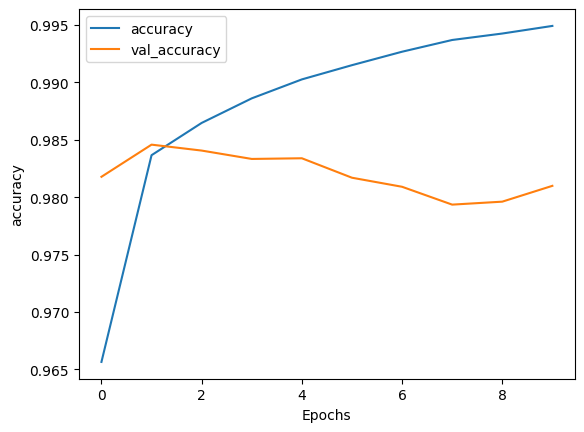

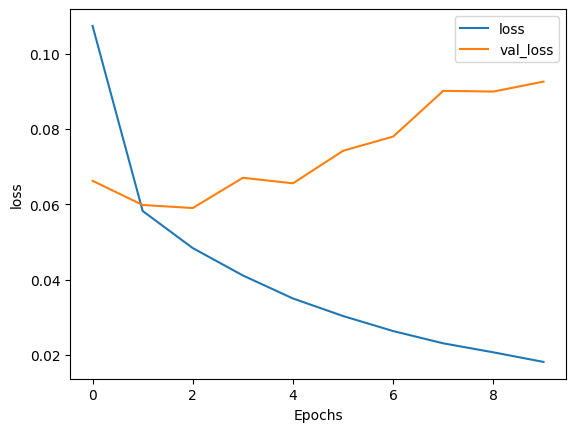

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")